In [1]:
# Initial imports.
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px

from path import Path
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, export_text
from matplotlib import pyplot as plt
import seaborn as sns

import pydotplus
import io
from scipy import misc #access to img read method

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
#cell magic

In [2]:
data = pd.read_csv('Resources/merged.csv', encoding='latin')

In [3]:
data.head()

Popularity  artist_names      track_name artist_genres  danceability  \
0           1         Drake  In My Feelings   ['hip hop']         0.735   
1           1         Drake  In My Feelings   ['hip hop']         0.835   
2           1  Shawn Mendes        Senorita       ['pop']         0.759   
3           1         Drake         Nonstop   ['hip hop']         0.909   
4           1  Shawn Mendes        Senorita       ['pop']         0.759   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.482    8    -9.445     1       0.1390       0.00623           0.01440   
1   0.626    1    -5.833     1       0.1250       0.05890           0.00006   
2   0.540    9    -6.039     0       0.0287       0.03700           0.00000   
3   0.405    6    -8.133     0       0.1400       0.03060           0.00698   
4   0.548    9    -6.049     0       0.0290       0.03920           0.00000   

   liveness  valence    tempo  duration_ms  
0    0.4480    0.315  181.995       217933  
1    0.3960    0.350   91.030       217925  
2    0.0945    0.750  116.947       190960  
3    0.1050    0.455  154.984       238613  
4    0.0828    0.749  116.967       190800

In [4]:
data.describe()

Popularity  danceability       energy          key     loudness  \
count  4291.000000   4291.000000  4291.000000  4291.000000  4291.000000   
mean    102.708693      0.695772     0.640146     5.329061    -6.074268   
std      56.768983      0.138846     0.158111     3.668087     2.322777   
min       1.000000      0.238000     0.111000     0.000000   -18.435000   
25%      54.000000      0.609000     0.537000     2.000000    -7.226000   
50%     103.000000      0.714000     0.658000     6.000000    -5.696000   
75%     152.000000      0.797000     0.762000     8.000000    -4.521000   
max     200.000000      0.970000     0.972000    11.000000    -0.515000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  4291.000000  4291.000000   4291.000000       4291.000000  4291.000000   
mean      0.577721     0.114078      0.238406          0.007309     0.170844   
std       0.493980     0.102970      0.238018          0.048404     0.131597   
min       0.000000     0.023200      0.000025          0.000000     0.021500   
25%       0.000000     0.044800      0.047600          0.000000     0.093600   
50%       1.000000     0.070700      0.160000          0.000000     0.118000   
75%       1.000000     0.145000      0.349000          0.000029     0.194000   
max       1.000000     0.856000      0.991000          0.657000     0.920000   

           valence        tempo    duration_ms  
count  4291.000000  4291.000000    4291.000000  
mean      0.509682   120.845921  204597.398509  
std       0.224947    29.191136   44103.762713  
min       0.037000    62.948000   30583.000000  
25%       0.338000    96.145500  175933.000000  
50%       0.508000   118.961000  200785.000000  
75%       0.680000   140.023000  226987.000000  
max       0.972000   203.927000  588139.000000

In [5]:
print(data.keys())

Index(['Popularity', 'artist_names', 'track_name', 'artist_genres',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [6]:
#clearing nuns
pd.isnull(data).sum()

Popularity          0
artist_names        0
track_name          0
artist_genres       0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

Text(0.5, 1.0, 'Popularity Based on Danceability')

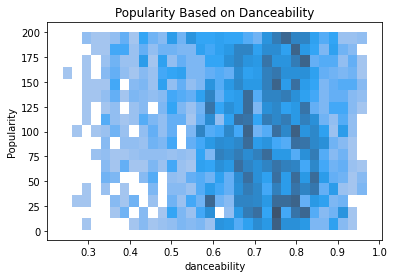

In [7]:
sns.histplot(x = 'danceability', y = 'Popularity', data = data)
plt.title('Popularity Based on Danceability')

Text(0.5, 1.0, 'Popularity Based on Key')

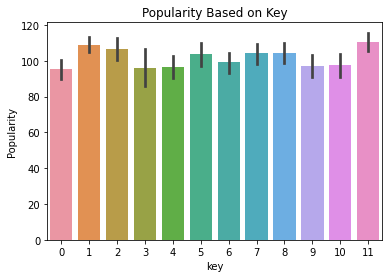

In [8]:
sns.barplot(x = 'key', y = 'Popularity', data = data)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Valence')

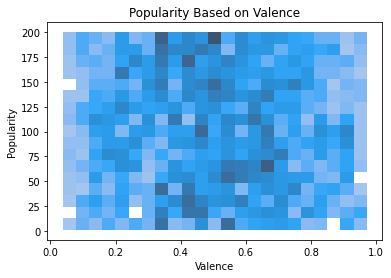

In [9]:
sns.histplot(x = 'valence', y = 'Popularity', data = data)
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.title('Popularity Based on Valence')

<AxesSubplot:xlabel='loudness', ylabel='Popularity'>

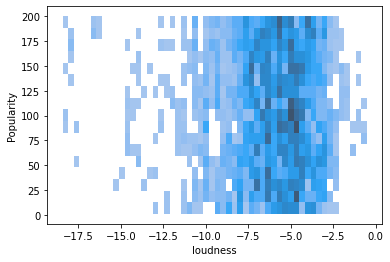

In [10]:
sns.histplot(x = 'loudness', y = 'Popularity', data = data)

<AxesSubplot:xlabel='acousticness', ylabel='Popularity'>

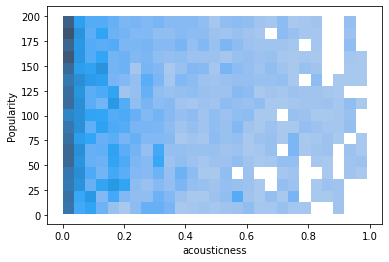

In [11]:
sns.histplot(x = 'acousticness', y = 'Popularity', data = data)

In [12]:
corr=data.corr()
corr
#correlation matrix

Popularity  danceability    energy       key  loudness  \
Popularity          1.000000     -0.086276 -0.027783  0.007366 -0.033903   
danceability       -0.086276      1.000000  0.093722  0.090748  0.176717   
energy             -0.027783      0.093722  1.000000  0.041759  0.706547   
key                 0.007366      0.090748  0.041759  1.000000  0.018092   
loudness           -0.033903      0.176717  0.706547  0.018092  1.000000   
mode                0.013043     -0.118495 -0.051149 -0.128741 -0.018340   
speechiness         0.027805      0.184960 -0.045943  0.034259 -0.110198   
acousticness        0.004314     -0.224515 -0.542052 -0.012451 -0.390421   
instrumentalness   -0.001506     -0.058706 -0.052432  0.019772 -0.209229   
liveness           -0.008425     -0.069002  0.090936 -0.017671  0.012732   
valence            -0.048123      0.409413  0.416433  0.101390  0.388370   
tempo               0.020086     -0.095547  0.083706 -0.055000  0.047879   
duration_ms         0.052855     -0.154230  0.007753 -0.031227 -0.031050   

                      mode  speechiness  acousticness  instrumentalness  \
Popularity        0.013043     0.027805      0.004314         -0.001506   
danceability     -0.118495     0.184960     -0.224515         -0.058706   
energy           -0.051149    -0.045943     -0.542052         -0.052432   
key              -0.128741     0.034259     -0.012451          0.019772   
loudness         -0.018340    -0.110198     -0.390421         -0.209229   
mode              1.000000    -0.066492      0.036913          0.002436   
speechiness      -0.066492     1.000000     -0.045309         -0.007028   
acousticness      0.036913    -0.045309      1.000000         -0.008011   
instrumentalness  0.002436    -0.007028     -0.008011          1.000000   
liveness         -0.028025    -0.022835     -0.085148         -0.032426   
valence          -0.039835    -0.003244     -0.149192         -0.068236   
tempo             0.026260     0.185111     -0.060281          0.032449   
duration_ms       0.032349    -0.114408      0.008967          0.063583   

                  liveness   valence     tempo  duration_ms  
Popularity       -0.008425 -0.048123  0.020086     0.052855  
danceability     -0.069002  0.409413 -0.095547    -0.154230  
energy            0.090936  0.416433  0.083706     0.007753  
key              -0.017671  0.101390 -0.055000    -0.031227  
loudness          0.012732  0.388370  0.047879    -0.031050  
mode             -0.028025 -0.039835  0.026260     0.032349  
speechiness      -0.022835 -0.003244  0.185111    -0.114408  
acousticness     -0.085148 -0.149192 -0.060281     0.008967  
instrumentalness -0.032426 -0.068236  0.032449     0.063583  
liveness          1.000000  0.037553 -0.011204    -0.022903  
valence           0.037553  1.000000 -0.001146    -0.097255  
tempo            -0.011204 -0.001146  1.000000    -0.046033  
duration_ms      -0.022903 -0.097255 -0.046033     1.000000

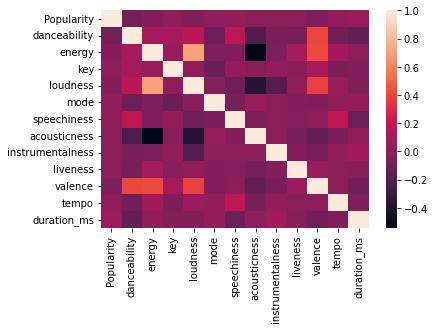

In [13]:
sns.heatmap(data.corr());

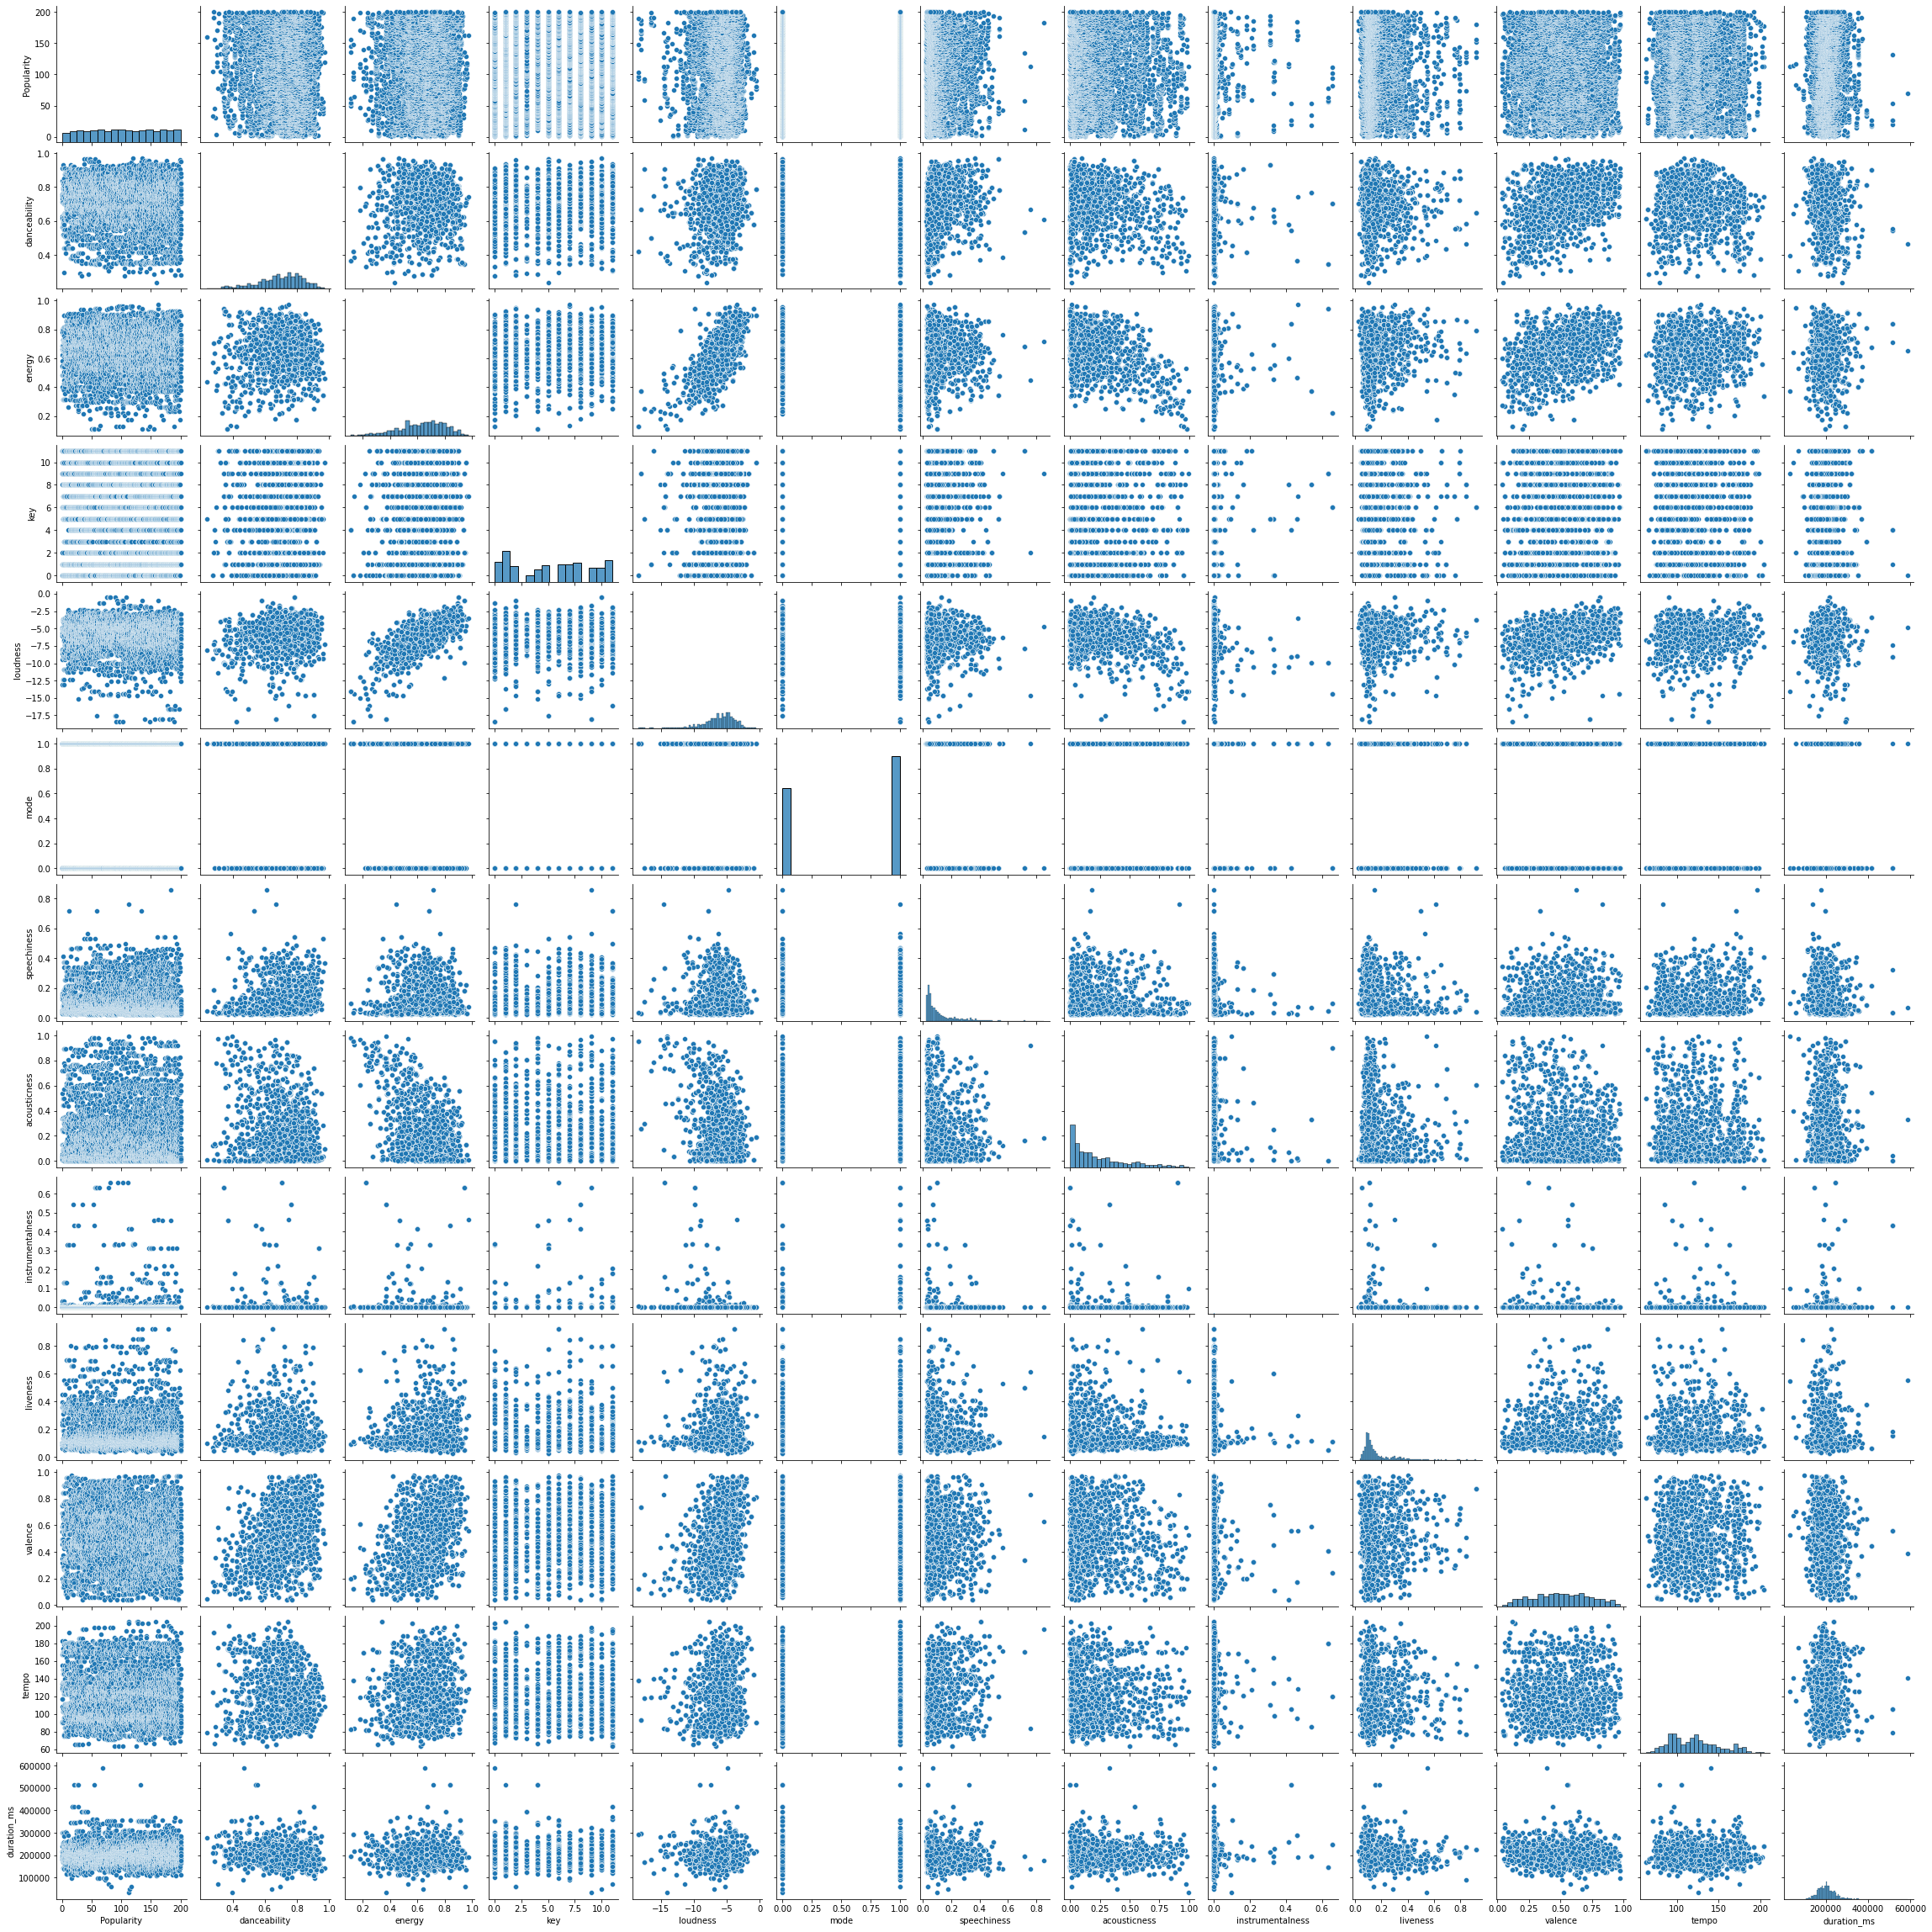

In [14]:
sns.pairplot(data)
plt.savefig('Resources/multi_plots')

## Preprocessing

In [15]:
data['Popularity'] = pd.qcut(data['Popularity'],q=2, labels=[0,1])

## One-hot coding

In [16]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df,dummies], axis = 1)
    df = df.drop(column,axis=1)
    return df

In [17]:
data = onehot_encode(data, 'artist_names', 'artist')
data = onehot_encode(data, 'track_name', 'tracks')
data = onehot_encode(data, 'artist_genres', 'genre')

In [18]:
data

Popularity  danceability  energy  key  loudness  mode  speechiness  \
0             0         0.735   0.482    8    -9.445     1       0.1390   
1             0         0.835   0.626    1    -5.833     1       0.1250   
2             0         0.759   0.540    9    -6.039     0       0.0287   
3             0         0.909   0.405    6    -8.133     0       0.1400   
4             0         0.759   0.548    9    -6.049     0       0.0290   
...         ...           ...     ...  ...       ...   ...          ...   
4286          1         0.949   0.661    5    -4.244     0       0.0572   
4287          1         0.824   0.587    6    -6.401     0       0.0937   
4288          1         0.527   0.835    6    -5.298     1       0.0433   
4289          1         0.715   0.470    5   -12.638     0       0.0772   
4290          1         0.780   0.719    3    -3.613     0       0.0506   

      acousticness  instrumentalness  liveness  ...  genre_['sad lo-fi']  \
0          0.00623          0.014400    0.4480  ...                    0   
1          0.05890          0.000060    0.3960  ...                    0   
2          0.03700          0.000000    0.0945  ...                    0   
3          0.03060          0.006980    0.1050  ...                    0   
4          0.03920          0.000000    0.0828  ...                    0   
...            ...               ...       ...  ...                  ...   
4286       0.03020          0.000000    0.0454  ...                    0   
4287       0.69000          0.000105    0.1490  ...                    0   
4288       0.01660          0.000000    0.2490  ...                    0   
4289       0.35300          0.092300    0.1040  ...                    0   
4290       0.30200          0.000196    0.0931  ...                    0   

      genre_['show tunes']  genre_['sleep']  genre_['trap argentino']  \
0                        0                0                         0   
1                        0                0                         0   
2                        0                0                         0   
3                        0                0                         0   
4                        0                0                         0   
...                    ...              ...                       ...   
4286                     0                0                         0   
4287                     0                0                         0   
4288                     0                0                         0   
4289                     0                0                         0   
4290                     0                0                         0   

      genre_['trap colombiano']  genre_['trap latino']  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   
...                         ...                    ...   
4286                          0                      0   
4287                          0                      0   
4288                          0                      0   
4289                          0                      0   
4290                          0                      1   

      genre_['tropical house']  genre_['urbano chileno']  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
4286                         0                         0   
4287                         0                         0   
4288                         0                         0   
4289             

### Splitting & Scaling

In [19]:
y = data.loc[:, 'Popularity']
X = data.drop('Popularity', axis = 1)

#spliting the data to line X

In [20]:
scaler = StandardScaler()
#scale each column in X column (popularity) with mean at 0 & variance 1

X = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 20)

## Model and training

## DecisionTree Clsasifier

In [22]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_acc = dt_model.score(X_test, y_test)
print("DT_Accuracy:", dt_acc)

DT_Accuracy: 0.703728362183755


## RandomForest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
random_model = RandomForestClassifier()
random_model.fit(X_train, y_train)
random_accuracy = random_model.score(X_test, y_test)
print("RF_Accuracy: ",random_accuracy)

RF_Accuracy:  0.6924101198402131


## Logistic Regression Classifier

In [25]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_accuracy = logistic_reg.score(X_test, y_test)
print("Log_Reg_Accuracy: ",logistic_reg_accuracy)

Log_Reg_Accuracy:  0.7013981358189081


## Performance of Classifiers

In [26]:
performance_accuracy = pd.DataFrame({'Classifiers': ['LogisticRegression', 'RandomForestClassifier','DecisionTreeClassifier',],
                                            'Accuracy': [logistic_reg_accuracy,random_accuracy,dt_acc]})

In [27]:
performance_accuracy.sort_values(by = "Accuracy", ascending = False)

Classifiers  Accuracy
2  DecisionTreeClassifier  0.703728
0      LogisticRegression  0.701398
1  RandomForestClassifier  0.692410

In [28]:
performance_accuracy.to_csv("Resources/calssifiers.csv")

In [29]:
fig = px.bar(
    x = ['Random Forest', 'Logistic Regression', 'Decision Tree'],
    y = [random_accuracy,logistic_reg_accuracy,dt_acc],
    color = ['Random Forest', 'Logistic Regression', 'Decision Tree'],
    labels = {'x' : "Model", 'y' : "Accuracy"},
    title = "Classifier Comparision"
)
fig.show()